In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date, timedelta


dfm=pd.read_csv('cleaned_dataset_V1.csv')
#dfmprint(dfm.describe())
dfm

,Name,Inspection Date,Description,City,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Category
0,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3
1,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,5,1.0,3
2,#807 TUTTA BELLA,01/13/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,1.0,3
3,#807 TUTTA BELLA,01/06/2021,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,1.0,3
4,+MAS CAFE,07/13/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,BLUE,0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249988,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,11/21/2018,Seating 0-12 - Risk Category III,SEATTLE,-122.312056,47.715359,Consultation/Education - Field,0.0,Complete,False,BLUE,0,2.0,3
249989,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,05/09/2018,Seating 0-12 - Risk Category III,SEATTLE,-122.312056,47.715359,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,2.0,3
249990,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,11/27/2017,Seating 0-12 - Risk Category III,SEATTLE,-122.312056,47.715359,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,2.0,3
249991,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,09/06/2017,Seating 0-12 - Risk Category III,SEATTLE,-122.312056,47.715359,Consultation/Education - Field,0.0,Complete,False,BLUE,0,2.0,3


In [5]:
df=dfm.loc[:, ['Inspection Score','Inspection Result','Inspection Date']]
df.rename(columns={'Inspection Date':'insdate','Inspection Result':'result' , 'Inspection Score':'score' }, inplace = True)
df.head(2)
df.describe()

,score
count,249993.000000
mean,14.135889
std,20.280024
min,-30.000000
25%,0.000000
50%,5.000000
75%,20.000000
max,178.000000


In [18]:
df

,score,result,insdate
0,10.0,Unsatisfactory,2022-08-31
1,10.0,Unsatisfactory,2022-08-31
2,0.0,Satisfactory,2022-01-13
3,0.0,Satisfactory,2021-01-06
4,0.0,Satisfactory,2022-07-13
...,...,...,...
249988,0.0,Complete,2018-11-21
249989,0.0,Satisfactory,2018-05-09
249990,0.0,Satisfactory,2017-11-27
249991,0.0,Complete,2017-09-06


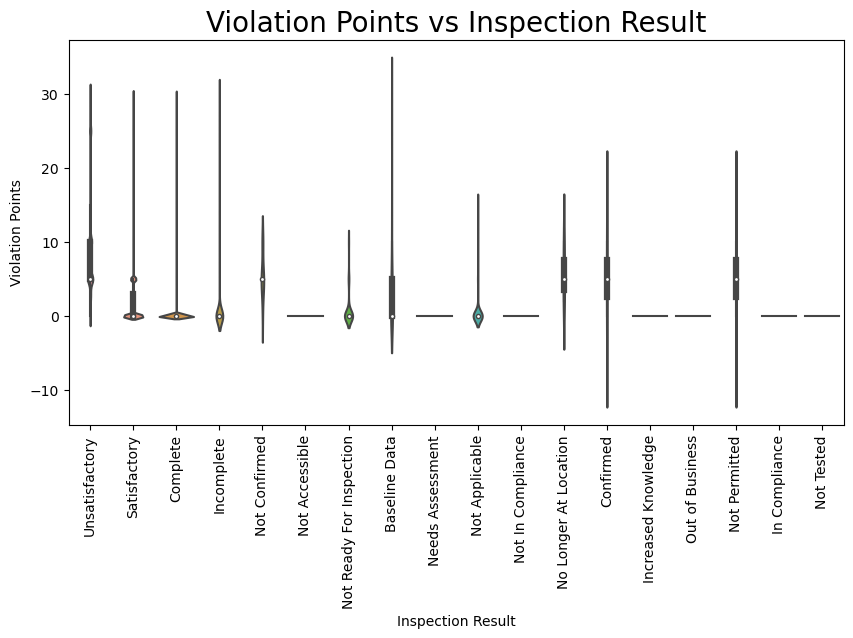

In [9]:
fig , ax = plt.subplots(1,1,figsize = (10,5))
ax = sns.violinplot(data=dfm , x = "Inspection Result" , y = "Violation Points") 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
ax.set_title("Violation Points vs Inspection Result" ,fontdict={"size" : 20});


1111111111111

In [41]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-01-01', end='2014-12-31').to_pydatetime()
# if datetime.datetime(2014,01,01) in holidays:
#     print True
df

,score,result,insdate
0,10.0,Unsatisfactory,2022-08-31
1,10.0,Unsatisfactory,2022-08-31
2,0.0,Satisfactory,2022-01-13
3,0.0,Satisfactory,2021-01-06
4,0.0,Satisfactory,2022-07-13
...,...,...,...
249988,0.0,Complete,2018-11-21
249989,0.0,Satisfactory,2018-05-09
249990,0.0,Satisfactory,2017-11-27
249991,0.0,Complete,2017-09-06


In [98]:
df['insdate'] = df['insdate'].astype('datetime64')
dfg=df.groupby(by=['insdate','result'],as_index=False).agg({'score':['mean','size']})
dfg.columns=['insdate','result','score','size']
dfg.head(2)

/tmp/ipykernel_787/392503667.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df['insdate'] = df['insdate'].astype('datetime64')


,insdate,result,score,size
0,2006-01-02,Complete,0.0,1
1,2006-01-03,Complete,0.0,1


In [99]:
dfg1=dfg.copy()
dfg1['day']=dfg1['insdate'].dt.dayofweek
dfg1['holiday']=dfg1['insdate'].apply(lambda x: True if (x+ timedelta(days=1)) in holidays else False)
dfg1['holiday']=dfg1.apply(lambda x: True if (x[4]>3) else x[5] ,axis=1 )
print("----------Holiday table----------")
dfg1.head(3)
# print(dfg1.loc[(dfg1['day']!=4) & (dfg1['day']!=5) & (dfg1['day']!=6)  & (dfg1['holiday']==True)])

----------Holiday table----------


,insdate,result,score,size,day,holiday
0,2006-01-02,Complete,0.0,1,0,False
1,2006-01-03,Complete,0.0,1,1,False
2,2006-01-03,Satisfactory,2.5,4,1,False


In [81]:
print(dfg1.groupby(by='result')['size'].size())
print(dfg1.groupby(by='holiday')['size'].size())

result
Baseline Data                 68
Complete                    4224
Confirmed                      2
In Compliance                  2
Incomplete                   569
Increased Knowledge            1
Needs Assessment               1
No Longer At Location          1
Not Accessible               178
Not Applicable                86
Not Confirmed                  5
Not In Compliance              1
Not Permitted                  2
Not Ready For Inspection      85
Not Tested                     1
Out of Business                2
Satisfactory                4698
Unsatisfactory              4493
Name: size, dtype: int64
holiday
False    10558
True      3861
Name: size, dtype: int64


In [82]:
pc=pd.pivot_table(dfg1,values='size',index=['result'],columns=['holiday'],aggfunc=np.sum)
pc2=pc.dropna()
pc2['percent']= pc2.iloc[:,1] /(pc2.iloc[:,1]+pc2.iloc[:,0])
pc3=pd.DataFrame(pc2['percent']).sort_values(by= 'percent',ascending=False)
print(pc2)

holiday                     False     True   percent
result                                              
Baseline Data                72.0     31.0  0.300971
Complete                  32148.0   6080.0  0.159046
Incomplete                  583.0    135.0  0.188022
Not Accessible              176.0     53.0  0.231441
Not Applicable              146.0     31.0  0.175141
Not Confirmed                 7.0      6.0  0.461538
Not Ready For Inspection     68.0     23.0  0.252747
Satisfactory              81684.0  17245.0  0.174317
Unsatisfactory            93035.0  18455.0  0.165531


/tmp/ipykernel_787/2330506416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc2['percent']= pc2.iloc[:,1] /(pc2.iloc[:,1]+pc2.iloc[:,0])




<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color=blue size=5>
           نمودار تاثیرگذاری تعطیلات در نتایج بازرسی
            </font>
        <br/>
        <font>
            نمودار نسبت نتایج بازرسی را درروزها تعطیل به کل نشان میدهد.  
تعطیلی در نتیجه بازرسی تاثیر معناداری نداشته است
            اما در روزهای تعطیل تعداد عدم دسترسیها و عدم آمادگیها بیشتر بوده است
            منظور از روزهای تعطیل خود تعطیلات و روزهای قبل از آن میباشد 
            
            
        </font>
        <br/>
    </font>
</div>

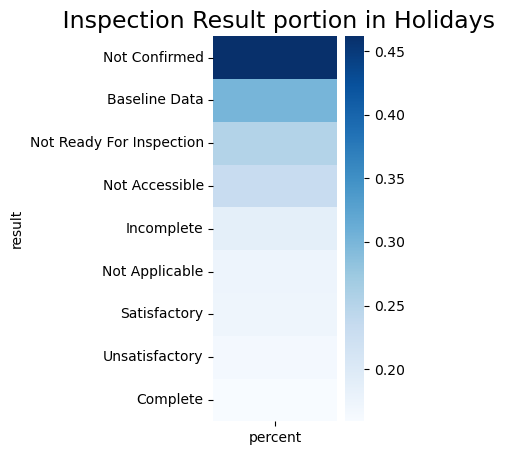

In [83]:
fig, ax = plt.subplots(figsize = (2,5))
ax=sns.heatmap(pc3,  cmap="Blues")
ax.set_title(" Inspection Result portion in Holidays" ,fontdict={"size" : 17});

In [85]:
pc=pd.pivot_table(dfg1,values='score',index=['day'],columns=['holiday'],aggfunc=np.mean)
# pc2=pc.dropna()
# pc2['percent']= pc2.iloc[:,1] /(pc2.iloc[:,1]+pc2.iloc[:,0])
# pc3=pd.DataFrame(pc2['percent']).sort_values(by= 'percent',ascending=False)
print(pc)

holiday     False      True 
day                         
0        9.113371   5.283470
1        9.469573  10.530303
2        9.198408  11.088095
3        9.772475  12.460317
4             NaN   9.091566
5             NaN   8.689577
6             NaN   7.416999




<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color=blue size=5>
           نمودار تاثیرگذاری روز هفته
            </font>
        <br/>
        <font>
            در نتایج  امتیازات بازرسی در روزهای کلا تعطیل(آخر هفته ها) امتیاز بازرسی کمی کمتر شده است: نتیجه بهتر 
اما در تعطیلات مناسبتی وسط هفته ُ امتیاز بیشتر شده است. − نتیجه ضعیف تر 
        </font>
        <br/>
    </font>
</div>

[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tus'),
 Text(0, 2.5, 'Wend'),
 Text(0, 3.5, 'Tur'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

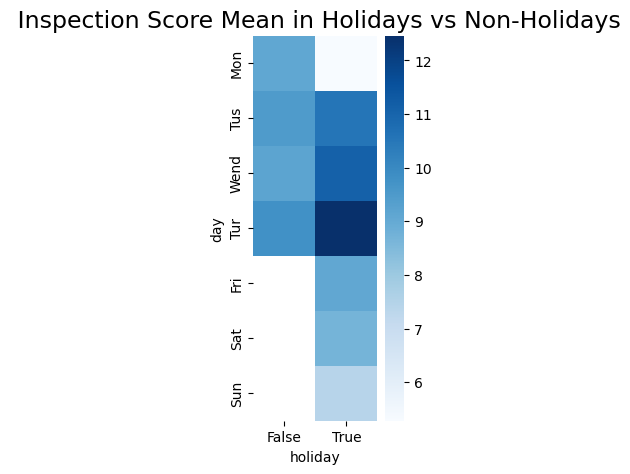

In [92]:
fig, ax = plt.subplots(figsize = (2,5))
ax=sns.heatmap(pc,  cmap="Blues")
ax.set_title(" Inspection Score Mean in Holidays vs Non-Holidays" ,fontdict={"size" : 17});
ax.set_yticklabels(['Mon','Tus','Wend','Tur','Fri','Sat','Sun'])

In [105]:
dfgyear=dfg.copy()
dfgyear['year']=dfg['insdate'].dt.year
dfgyear

,insdate,result,score,size,year
0,2006-01-02,Complete,0.000000,1,2006
1,2006-01-03,Complete,0.000000,1,2006
2,2006-01-03,Satisfactory,2.500000,4,2006
3,2006-01-03,Unsatisfactory,12.333333,9,2006
4,2006-01-04,Complete,0.000000,1,2006
...,...,...,...,...,...
14414,2022-11-08,Unsatisfactory,19.586207,29,2022
14415,2022-11-09,Complete,0.000000,8,2022
14416,2022-11-09,Incomplete,0.000000,1,2022
14417,2022-11-09,Satisfactory,1.454545,55,2022


In [141]:
ptyear=pd.pivot_table(dfgyear,values='size',index=['year'],columns=['result'],aggfunc=np.sum)
ptyear

result,Baseline Data,Complete,Confirmed,In Compliance,Incomplete,Increased Knowledge,Needs Assessment,No Longer At Location,Not Accessible,Not Applicable,Not Confirmed,Not In Compliance,Not Permitted,Not Ready For Inspection,Not Tested,Out of Business,Satisfactory,Unsatisfactory
year,,,,,,,,,,,,,,,,,,
2006,13.0,1967.0,NaN,NaN,49.0,NaN,NaN,3.0,22.0,1.0,3.0,NaN,NaN,1.0,NaN,NaN,3559.0,4241.0
2007,19.0,2139.0,NaN,NaN,33.0,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3669.0,4447.0
2008,25.0,2258.0,1.0,NaN,34.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3875.0,4316.0
2009,9.0,1979.0,1.0,NaN,24.0,NaN,1.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4148.0,4514.0
2010,19.0,2333.0,NaN,1.0,33.0,NaN,NaN,NaN,19.0,67.0,6.0,NaN,NaN,1.0,NaN,NaN,4482.0,5421.0
2011,7.0,2316.0,NaN,NaN,28.0,NaN,NaN,NaN,24.0,61.0,NaN,1.0,1.0,1.0,NaN,NaN,5266.0,5677.0
2012,4.0,2720.0,NaN,NaN,84.0,NaN,NaN,NaN,17.0,41.0,4.0,NaN,1.0,NaN,1.0,NaN,5773.0,6316.0
2013,7.0,3033.0,NaN,1.0,33.0,1.0,NaN,NaN,23.0,7.0,NaN,NaN,NaN,3.0,NaN,NaN,6037.0,6379.0
2014,NaN,2740.0,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,6062.0,8633.0


In [162]:
dfgyear.head(2)
dfgyear2=dfgyear[dfgyear['result'].str.contains('Satisfactory|Unsatisfactory|Incomplete|Complete')]
ptyear=pd.pivot_table(dfgyear2,values='size',index=['year'],columns=['result'],aggfunc=np.sum)

ptyear

result,Complete,Incomplete,Satisfactory,Unsatisfactory
year,,,,
2006,1967,49,3559,4241
2007,2139,33,3669,4447
2008,2258,34,3875,4316
2009,1979,24,4148,4514
2010,2333,33,4482,5421
2011,2316,28,5266,5677
2012,2720,84,5773,6316
2013,3033,33,6037,6379
2014,2740,52,6062,8633


In [130]:
dfgyear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14419 entries, 0 to 14418
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   insdate  14419 non-null  datetime64[ns]
 1   result   14419 non-null  object        
 2   score    14419 non-null  float64       
 3   size     14419 non-null  int64         
 4   year     14419 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 563.4+ KB


In [180]:
dfgyear

,insdate,result,score,size,year
0,2006-01-02,Complete,0.000000,1,2006
1,2006-01-03,Complete,0.000000,1,2006
2,2006-01-03,Satisfactory,2.500000,4,2006
3,2006-01-03,Unsatisfactory,12.333333,9,2006
4,2006-01-04,Complete,0.000000,1,2006
...,...,...,...,...,...
14414,2022-11-08,Unsatisfactory,19.586207,29,2022
14415,2022-11-09,Complete,0.000000,8,2022
14416,2022-11-09,Incomplete,0.000000,1,2022
14417,2022-11-09,Satisfactory,1.454545,55,2022




<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color=blue size=5>
           نمودار روند نتایج در سالهای مختلف
            </font>
        <br/>
        <font>
            تحلیلها:
            تاثیر کرونا در دوسال اخیر مشهود است
            رشد تعداد بازرسی ها در ۱۶ سال نشان داده شده
            نسبت بازرسهای موفق و ناموفق تغییر معناداری نداشته است
        </font>
        <br/>
    </font>
</div>

<AxesSubplot: xlabel='year'>

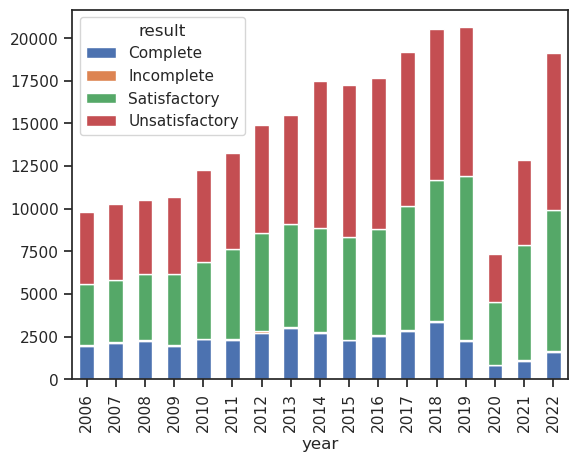

In [182]:
# fig , ax = plt.subplots(ncols=1 , nrows = 1)
# fig, ax = plt.subplots(figsize = (18,5))
# sns.set_theme(style="ticks")

# ax1=sns.barplot(x =ptyear.index , y=ptyear['Unsatisfactory'],width=0.2 )
# ax1=sns.barplot(x =ptyear.index , y=ptyear['Satisfactory'] ,width=0.3)
# ax3=sns.barplot(x =ptyear.index , y=ptyear['Complete'] ,width=0.1)

# sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic_df)
# ax=sns.ba/rplot(x =dfgyear2['year'] , y=dfgyear2['size'] , hue = dfgyear2['result'] , stacked=True )
ptyear.plot(kind='bar', stacked=True)

# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90 , fontdict={"size" : 12});
# ax.set_yticks(range(0,20,2));